In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
datasets = sns.get_dataset_names()
datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [5]:
def show_dataset(num):
  data = sns.load_dataset(datasets[num])
  print(f'Dataset: {datasets[num]}, shape: {data.shape}')
  return data.head(10)

In [6]:
show_dataset(5)

Dataset: diamonds, shape: (53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
data = sns.load_dataset(datasets[5])

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [10]:
data[['cut', 'color', 'clarity']].describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [11]:
data['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [12]:
cond = data['cut'] == 'Ideal'
data2 = data.loc[cond]

In [13]:
data2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


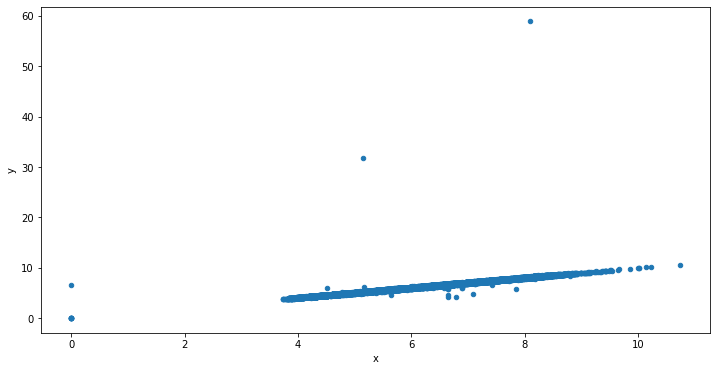

In [14]:
data.plot(kind='scatter', x='x', y='y', figsize=(12,6))

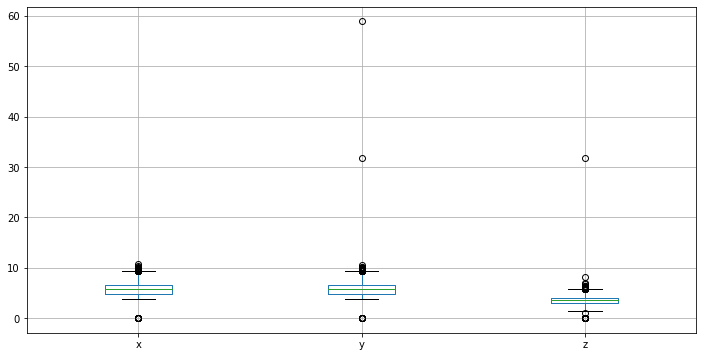

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
data[['x', 'y', 'z']].boxplot(ax=ax)

In [16]:
data3 = data.loc[(data['y'] < 20) & (data['x'] > 2)]

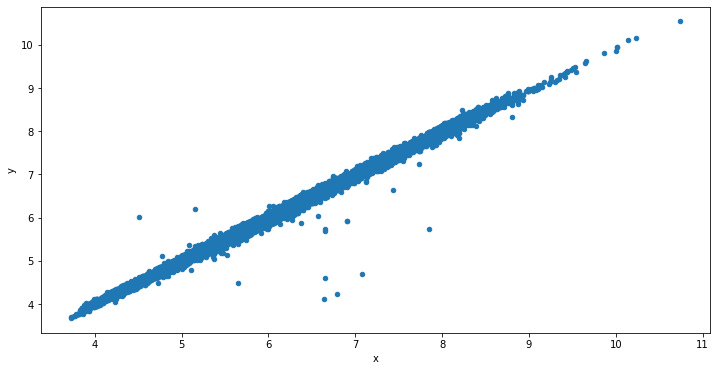

In [17]:
data3.plot(kind='scatter', x='x', y='y', figsize=(12,6))

In [18]:
data3.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028318,0.181669,0.921604,0.977764,0.976844,0.956126
depth,0.028318,1.000000,-0.295721,-0.010594,-0.025021,-0.028150,0.095636
table,0.181669,-0.295721,1.000000,0.127170,0.196138,0.189985,0.151736
price,0.921604,-0.010594,0.127170,1.000000,0.887217,0.888813,0.864092
x,0.977764,-0.025021,0.196138,0.887217,1.000000,0.998658,0.970890
y,0.976844,-0.028150,0.189985,0.888813,0.998658,1.000000,0.970628
z,0.956126,0.095636,0.151736,0.864092,0.970890,0.970628,1.000000


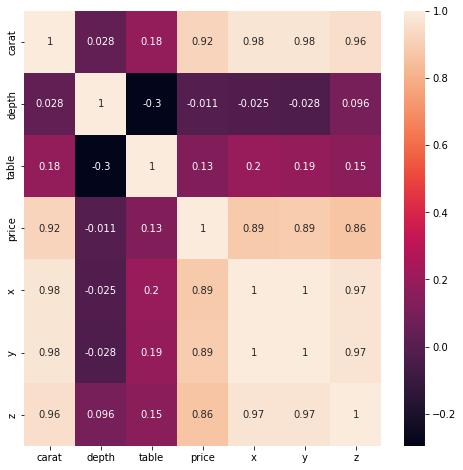

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data3.corr(), annot=True)
plt.show()

In [20]:
data[data.isna().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [21]:
data['price'].loc[data.sample(frac=0.1).index]

13131     5433
15472     6196
40787     1168
23940    12071
30704      737
         ...  
47091     1825
16207     6479
195       2777
41035     1187
26452    15992
Name: price, Length: 5394, dtype: int64

In [22]:
data.loc[data.sample(frac=0.1).index, 'price'] = np.nan

In [23]:
data[data.isna().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
13,0.31,Ideal,J,SI2,62.2,54.0,NaN,4.35,4.37,2.71
24,0.31,Very Good,J,SI1,58.1,62.0,NaN,4.44,4.47,2.59
33,0.23,Very Good,E,VS1,59.5,58.0,NaN,4.01,4.06,2.40
34,0.23,Very Good,D,VS1,61.9,58.0,NaN,3.92,3.96,2.44
56,0.30,Premium,J,SI2,59.3,61.0,NaN,4.43,4.38,2.61
...,...,...,...,...,...,...,...,...,...,...
53874,0.71,Very Good,D,VS2,62.5,60.0,NaN,5.61,5.65,3.52
53892,0.70,Ideal,F,VS1,62.5,56.0,NaN,5.73,5.70,3.57
53910,0.70,Premium,E,SI1,60.5,58.0,NaN,5.74,5.77,3.48
53912,0.61,Premium,F,VVS1,61.8,59.0,NaN,5.48,5.40,3.36


In [24]:
data['price'].mean()

3936.8394718411405

In [30]:
data['price'].sum() / (53940 - 5394)

3936.8394718411405

In [25]:
data['price'].median()

2401.0

In [26]:
data['price'].min(), data['price'].max()

(326.0, 18823.0)

In [33]:
data.loc[data.isna().any(axis=1), 'price'] = data['price'].mean()

In [34]:
data[data.isna().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
